In [1]:
import time
import datetime
principio = datetime.datetime.now()
principio

datetime.datetime(2024, 1, 9, 20, 32, 28, 270208)

In [2]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.utils.plotting import plot_series
import seaborn as sns
from sktime.transformations.series.boxcox import LogTransformer
from sktime.transformations.series.difference import Differencer
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.arima import AutoARIMA
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError
from sklearn.metrics import r2_score



# Read Data
data = pd.read_csv('../data/datos semanales.csv')
data.set_index('Fecha', inplace=True)
transformer = LogTransformer()
data.index = pd.to_datetime(data.index)
log_data = transformer.fit_transform(data)
data


Bad key savefig.frameon in file C:\Users\manue\anaconda3\envs\TecnicasPrediccion\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\manue\anaconda3\envs\TecnicasPrediccion\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\manue\anaconda3\envs\TecnicasPrediccion\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.std

,Billetes
Fecha,
2013-01-12,62614
2013-01-19,59301
2013-01-26,56391
2013-02-02,62981
2013-02-09,65258
...,...
2016-12-03,163841
2016-12-10,127511
2016-12-17,162260


In [3]:
y_train, y_test = temporal_train_test_split(y = data.astype('float64').to_period('W-Sat'), test_size=5)
log_y_train, log_y_test = temporal_train_test_split(y = log_data.astype('float64').to_period('w'), test_size=5)

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot:>)

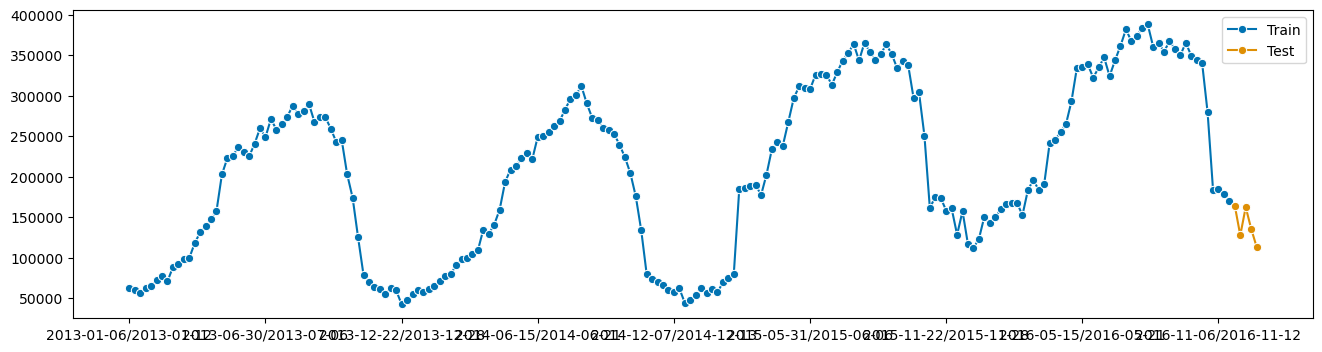

In [4]:
plot_series(y_train, y_test, labels=["Train", "Test"])

In [5]:
fh = np.arange(len(y_test)) + 1

Ahora sin log

Moldelo elegido: Parameters: (True, False, 'aic', 'mse', 52), MAPE: 0.050223996299127306

In [6]:
forecaster = AutoARIMA(
        seasonal=True,
        stationary=False,
        information_criterion='aic',
        scoring='mse',
        sp=52,
        suppress_warnings=True)
forecaster.fit(y_train)

AutoARIMA(sp=52, suppress_warnings=True)

In [7]:
y_train

,Billetes
2013-01-06/2013-01-12,62614.0
2013-01-13/2013-01-19,59301.0
2013-01-20/2013-01-26,56391.0
2013-01-27/2013-02-02,62981.0
2013-02-03/2013-02-09,65258.0
...,...
2016-10-23/2016-10-29,279404.0
2016-10-30/2016-11-05,183583.0
2016-11-06/2016-11-12,184902.0
2016-11-13/2016-11-19,178948.0


In [8]:
fh = np.arange(len(y_test)) + 1  # forecasting horizon
y_pred = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot:>)

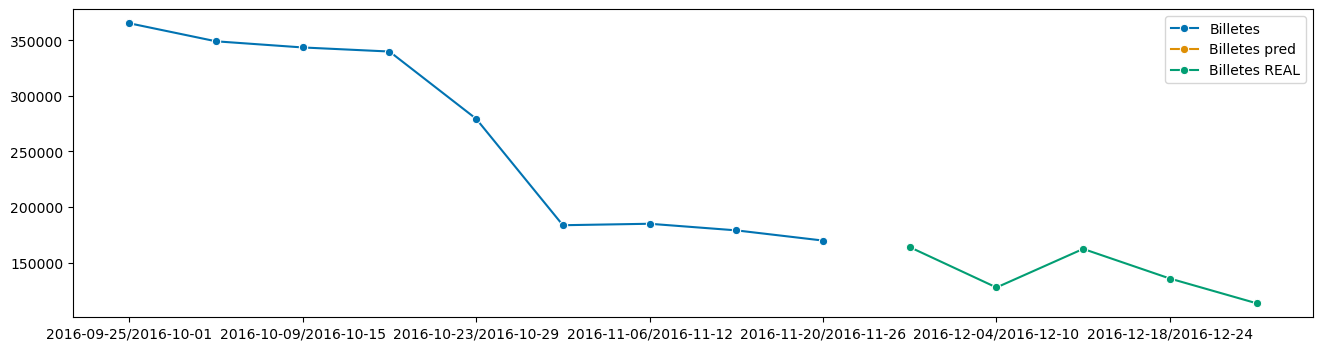

In [9]:
# Forecast Accuracy Plot
# Plotting predictions and past data
plot_series(y_train["2016-10":], np.exp(y_pred),y_test, labels=["Billetes", "Billetes pred", "Billetes REAL"])

In [10]:
y_train

,Billetes
2013-01-06/2013-01-12,62614.0
2013-01-13/2013-01-19,59301.0
2013-01-20/2013-01-26,56391.0
2013-01-27/2013-02-02,62981.0
2013-02-03/2013-02-09,65258.0
...,...
2016-10-23/2016-10-29,279404.0
2016-10-30/2016-11-05,183583.0
2016-11-06/2016-11-12,184902.0
2016-11-13/2016-11-19,178948.0


(<Figure size 1600x400 with 1 Axes>, <AxesSubplot:>)

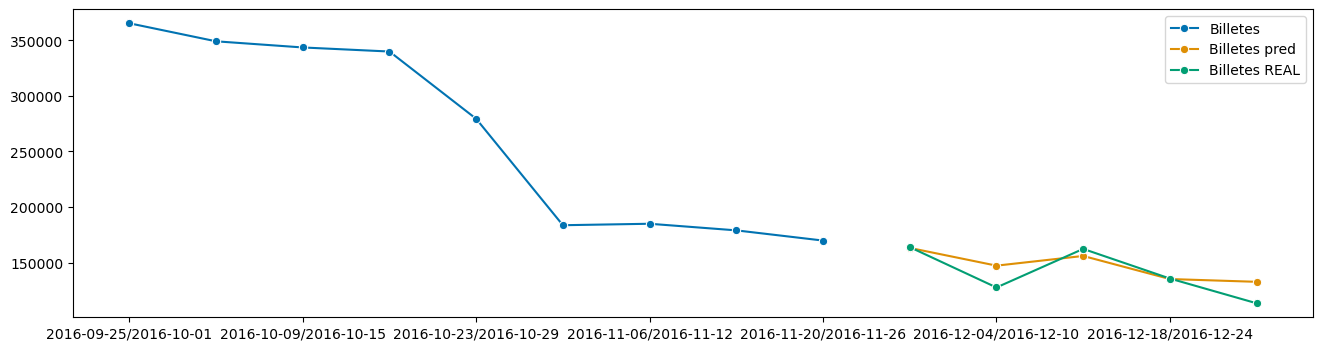

In [11]:
# Forecast Accuracy Plot
# Plotting predictions and past data
# Zoom 2013 -2021
plot_series(y_train["2016-10":], y_pred, y_test, labels=["Billetes", "Billetes pred", "Billetes REAL"])

In [12]:
mape = mean_absolute_percentage_error(y_test[0:4], y_pred[0:4])
mse = MeanSquaredError()
mse = mse(y_test[0:4], y_pred[0:4])
r2 = r2_score(y_test, y_pred)

print(f'MAPE: {mape}')
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

MAPE: 0.050223996299127306
MSE: 106895350.8291548
R2 Score: 0.5896105768400857


In [13]:
final = datetime.datetime.now()
duracion = final-principio
print(principio)
print(final)
print(duracion)

2024-01-09 20:32:28.270208
2024-01-09 20:38:59.253741
0:06:30.983533
